In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy import signal
import IPython.display as ipd
import warnings 
warnings.filterwarnings('ignore')
import math

## 1. Telephonic-like data

16000


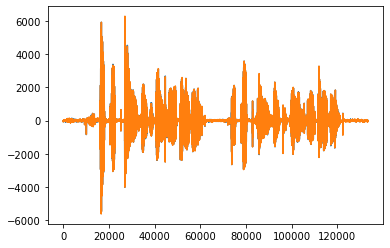

In [2]:
fs,data = wavfile.read('brown_fox.wav')
print(fs)
plt.plot(data)
plt.show()

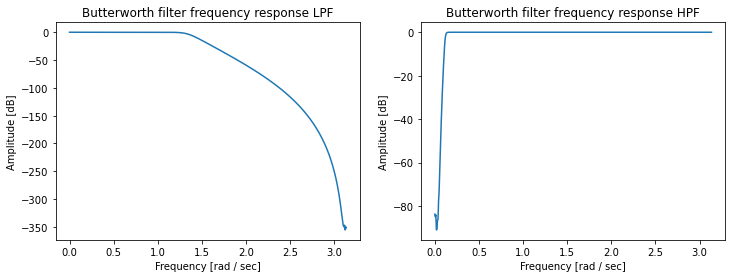

In [3]:
fc_low = 3400
fs = 16000
w_low = fc_low / (fs / 2)

fc_high = 300
w_high = fc_high / (fs / 2)

b_low, a_low = signal.butter(N = 10, Wn = w_low, btype = 'low', output = 'ba')
w_low, h_low = signal.freqz(b_low, a_low)


b_high, a_high = signal.butter(N = 10, Wn = w_high, btype = 'high', output = 'ba')
w_high, h_high = signal.freqz(b_high, a_high)

plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(w_low, 20 * np.log10(abs(h_low)))
plt.title('Butterworth filter frequency response LPF')
plt.xlabel('Frequency [rad / sec]')
plt.ylabel('Amplitude [dB]')

plt.subplot(122)
plt.plot(w_high, 20 * np.log10(abs(h_high)))
plt.title('Butterworth filter frequency response HPF')
plt.xlabel('Frequency [rad / sec]')
plt.ylabel('Amplitude [dB]')

plt.show()

In [4]:
output = signal.filtfilt(b_low, a_low, data[:, 0])
output = signal.filtfilt(b_high, a_high, output)

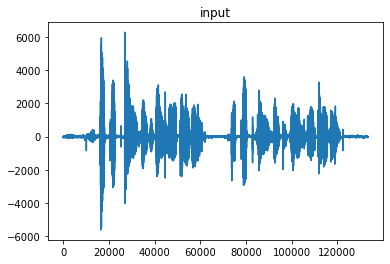

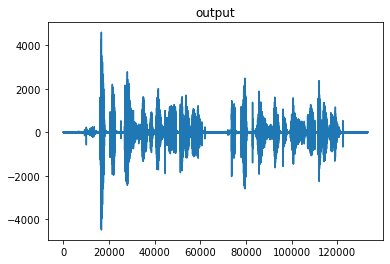


input data
output


In [5]:
plt.plot(data[:, 0])
plt.title("input")
plt.show()

plt.plot(output)
plt.title("output")
plt.show()

print()
print("input data")
#ipd.display(ipd.Audio(data=data[:, 0], rate=fs))

print("output")
#ipd.display(ipd.Audio(data=output, rate=fs))

## 2. FIR design

In [6]:
numtaps = 21
f_low = 3400
h_low = signal.firwin(numtaps, f_low, pass_zero = 'lowpass', window ='hamming', fs = 16000)

f_high = 300
h_high = signal.firwin(numtaps, f_high, pass_zero = 'highpass', window ='hamming', fs = 16000)

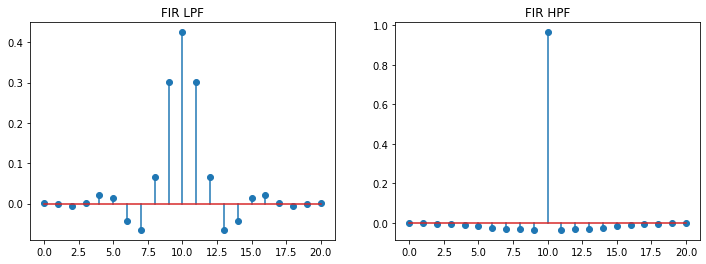

In [7]:
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.stem(h_low)
plt.title('FIR LPF')

plt.subplot(122)
plt.stem(h_high)
plt.title('FIR HPF')
plt.show()

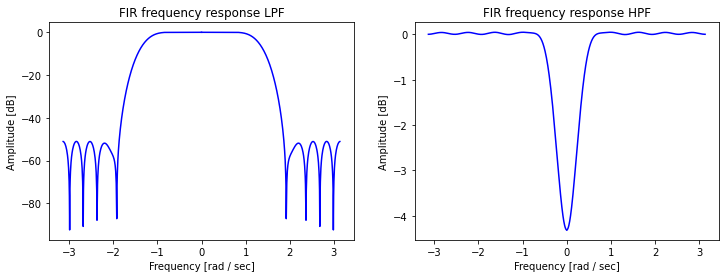

In [8]:
w_low, H_low = signal.freqz(h_low, a = 1)
w_high, H_high = signal.freqz(h_high, a = 1)

plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(w_low, 20 * np.log10(abs(H_low)),  color = 'b')
plt.plot(-1*w_low, 20 * np.log10(abs(H_low)), color = 'b')
plt.title('FIR frequency response LPF')
plt.xlabel('Frequency [rad / sec]')
plt.ylabel('Amplitude [dB]')

plt.subplot(122)
plt.plot(w_high, 20 * np.log10(abs(H_high)),  color = 'b')
plt.plot(-1*w_high, 20 * np.log10(abs(H_high)), color = 'b')
plt.title('FIR frequency response HPF')
plt.xlabel('Frequency [rad / sec]')
plt.ylabel('Amplitude [dB]')


plt.show()

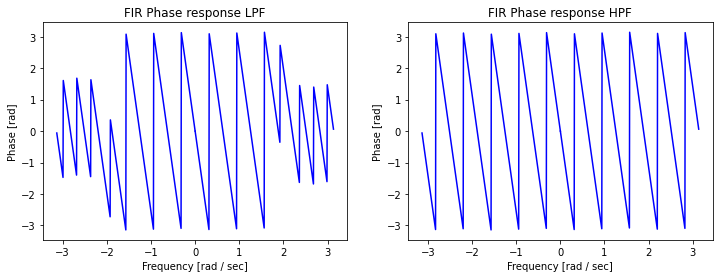

In [9]:
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(w_low, (np.angle(H_low)), color = 'b')
plt.plot(-1*w_low, -1*(np.angle(H_low)), color = 'b')
plt.title('FIR Phase response LPF')
plt.xlabel('Frequency [rad / sec]')
plt.ylabel('Phase [rad]')

plt.subplot(122)
plt.plot(w_high,  (np.angle(H_high)), color = 'b')
plt.plot(-1*w_high, -1 * (np.angle(H_high)) ,color = 'b')
plt.title('FIR Phase response HPF')
plt.xlabel('Frequency [rad / sec]')
plt.ylabel('Phase [rad]')

plt.show()

## 3. Sinusoidal tone removal

In [10]:
fs,data = wavfile.read('brown_fox.wav')
data[:,0]
print(len(data[:, 0]))

133280


In [11]:
signal_power = np.sum(np.square(data[:,0]))/len(data[:,0])
print(signal_power)

1847.6096338535415


In [12]:
#SNR = -20dB
# SNR in dB = 10*log10(signal_power/noise_power) 10*log10(signal_power)-10*log10(noise_power)  = 20dB
# noise power = signal_power/(10^(SNR/10))
SNR = 20
noise_power = signal_power/(10**(SNR/10))
print(noise_power)

18.476096338535413


In [13]:
# A*sin(Qt + phi) power of this sinosuidal signal is = A^2/2 = noise_power i.e A = sqrt(2*np)

A = np.sqrt(2*noise_power)
A

6.078831522346283

In [14]:
n = np.linspace(0, 8.33, num = 133280)
fnoise = 5000
noise = A * np.sin(2 * np.pi * fnoise * n)
noise = noise.reshape(133280, )

In [15]:
noisy_data = data[:, 0] + noise

In [16]:
noisy_data.shape

(133280,)

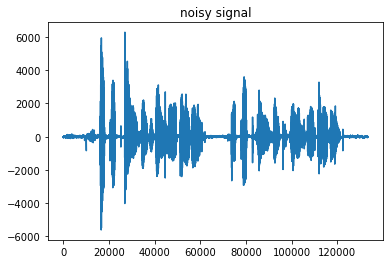

In [19]:
plt.plot(noisy_data)
plt.title("noisy signal")
plt.show()
ipd.display(ipd.Audio(data=noisy_data, rate=fs))

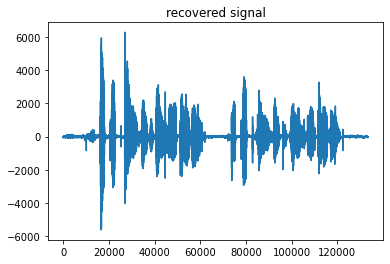

In [21]:
b_notch, a_notch = signal.iirnotch(5000, Q = 30,  fs = 16000)
rec = signal.filtfilt(b_notch, a_notch, noisy_data)

plt.plot(rec)
plt.title("recovered signal")
plt.show()
ipd.display(ipd.Audio(data=rec, rate=fs))